In [6]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import cm
import tadasets
import ripser
from ripser import Rips
import persim

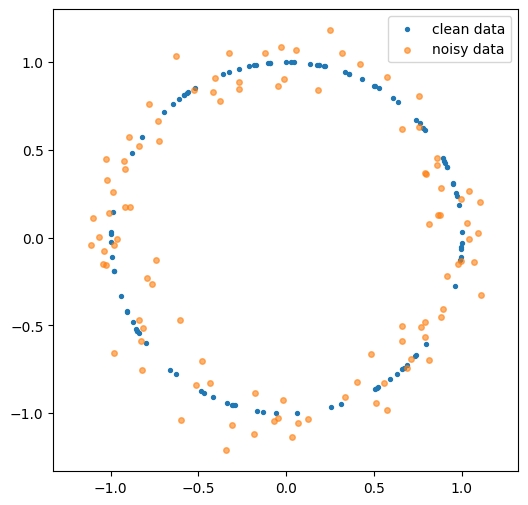

In [7]:
np.random.seed(565656)

data_clean = tadasets.dsphere(d=1, n=100, noise=0.0)
data_noisy = tadasets.dsphere(d=1, n=100, noise=0.10) 

# data_clean = tadasets.infty_sign(n=100, noise=0.0)
# data_noisy = tadasets.infty_sign(n=100, noise=0.15) 

plt.rcParams["figure.figsize"] = (6, 6)
plt.scatter(data_clean[:,0], data_clean[:,1], label="clean data", s=8)
plt.scatter(data_noisy[:,0], data_noisy[:,1], label="noisy data", s=16, alpha=0.6)
plt.axis('equal')
plt.legend()
plt.show()

In [8]:
def diagram_sizes(dgms):
    return ", ".join([f"|$H_{i}$|={len(d)}" for i, d in enumerate(dgms)])

[[-0.21173708  0.97732666]
 [-0.99395282 -0.10980802]
 [ 0.68944806 -0.72433512]
 [ 0.13541518  0.99078894]
 [ 0.35976235  0.93304397]
 [-0.41952556 -0.90774352]
 [-0.62877984 -0.77758338]
 [ 0.78163092  0.62374122]
 [ 0.18915007  0.98194819]
 [ 0.51722009 -0.85585243]
 [ 0.99856341 -0.0535828 ]
 [-0.13261969 -0.991167  ]
 [ 0.91568008  0.40190795]
 [ 0.02965263  0.99956026]
 [-0.30103274 -0.95361381]
 [ 0.96155289 -0.27461981]
 [ 0.79044732  0.61253003]
 [ 0.43207052  0.90183982]
 [ 0.04486014  0.99899328]
 [ 0.06083005 -0.99814814]
 [ 0.89970569  0.43649705]
 [-0.06021434 -0.99818547]
 [-0.90440981 -0.42666486]
 [-0.81943397  0.57317359]
 [-0.09243994  0.99571826]
 [ 0.66175446 -0.74972064]
 [ 0.98291927  0.18403724]
 [-0.85449827 -0.51945424]
 [-0.98119639 -0.19301202]
 [-0.90953374 -0.41563009]
 [ 0.74201753  0.67038047]
 [-0.2693999   0.9630284 ]
 [ 0.525213   -0.8509708 ]
 [ 0.21720969  0.97612497]
 [ 0.50678407 -0.86207303]
 [-0.99956701  0.02942444]
 [-0.32446036  0.94589929]
 

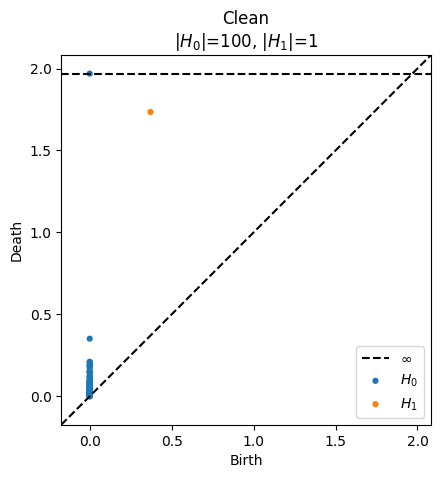

In [19]:
dgm_clean = ripser.ripser(data_clean)['dgms']
print(data_clean)
persim.plot_diagrams(
    dgm_clean, 
    show=True, 
    title=f"Clean\n{diagram_sizes(dgm_clean)}"
) 

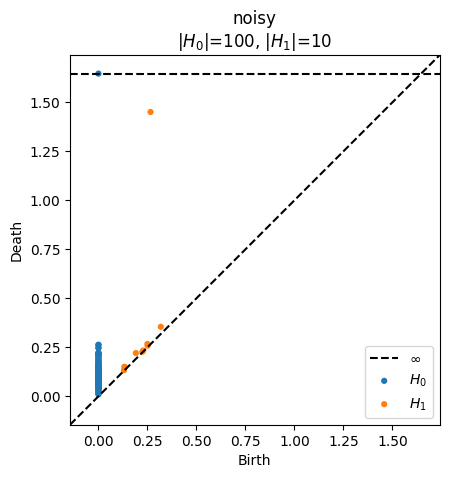

In [10]:
dgm_noisy = ripser.ripser(data_noisy)['dgms']
persim.plot_diagrams(
    dgm_noisy, 
    show=True, 
    title=f"noisy\n{diagram_sizes(dgm_noisy)}"
) 

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


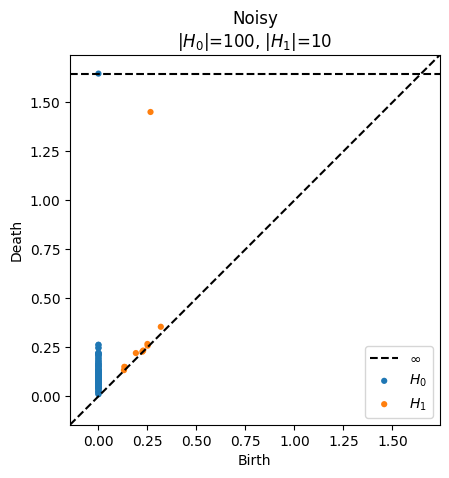

In [11]:
rips = Rips()
dgm_noisy = rips.transform(data_noisy)
rips.plot(show=True, title=f"Noisy\n{diagram_sizes(dgm_noisy)}") 

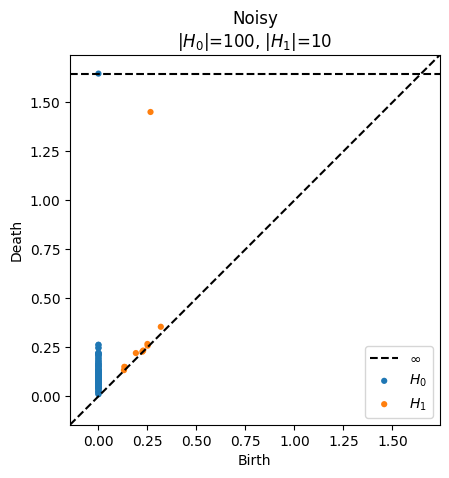

In [12]:
from sklearn.metrics.pairwise import pairwise_distances

D = pairwise_distances(data_noisy, metric='euclidean')

dgm_noisy = ripser.ripser(D, distance_matrix=True)['dgms']
persim.plot_diagrams(
    dgm_noisy, show=True, 
    title=f"Noisy\n{diagram_sizes(dgm_noisy)}"
) 

In [13]:
D

array([[0.        , 0.50226811, 1.77067546, ..., 2.21101275, 2.01394031,
        2.16217539],
       [0.50226811, 0.        , 1.32894317, ..., 2.15901471, 1.69096712,
        2.05359122],
       [1.77067546, 1.32894317, 0.        , ..., 1.82759112, 0.69915867,
        1.59805355],
       ...,
       [2.21101275, 2.15901471, 1.82759112, ..., 0.        , 1.2241781 ,
        0.25691474],
       [2.01394031, 1.69096712, 0.69915867, ..., 1.2241781 , 0.        ,
        0.97350449],
       [2.16217539, 2.05359122, 1.59805355, ..., 0.25691474, 0.97350449,
        0.        ]])

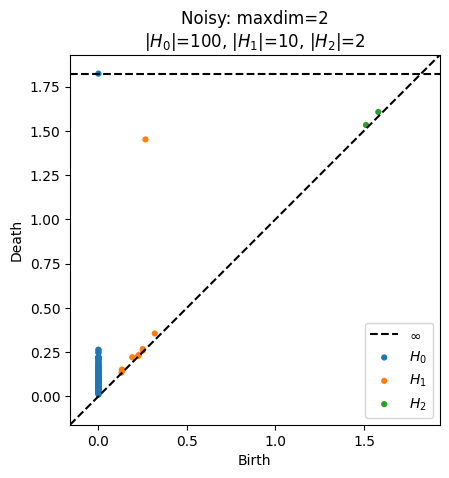

In [14]:
dgm_noisy = ripser.ripser(data_noisy, maxdim=2)['dgms']
persim.plot_diagrams(
    dgm_noisy, show=True, 
    title=f"Noisy: maxdim=2\n{diagram_sizes(dgm_noisy)}"
) 

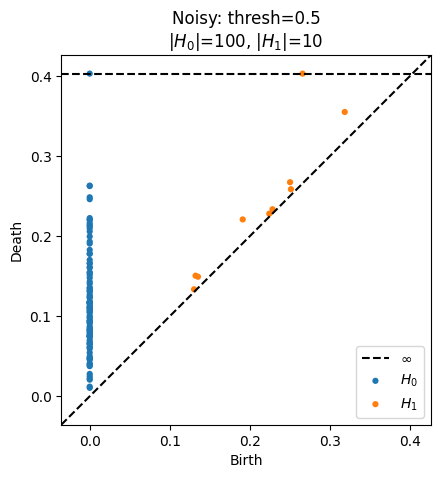

In [15]:
thresh = 0.5
dgm_noisy = ripser.ripser(data_noisy, thresh=thresh)['dgms']
persim.plot_diagrams(
    dgm_noisy, show=True, 
    title=f"Noisy: thresh={thresh}\n{diagram_sizes(dgm_noisy)}"
) 

/var/folders/4p/wry4137j6rdgdt6r05g3746h0000gn/T/ipykernel_66152/1023294582.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


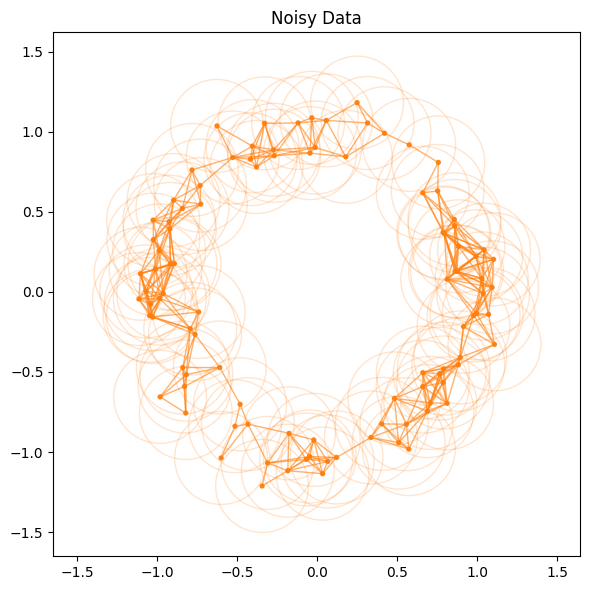

In [18]:
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

def plot_rips_complex(data, R, label="data", col=1, maxdim=2):
    tab10 = cm.get_cmap('tab10')

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title(label)
    ax.scatter(
        data[:, 0], data[:, 1], label=label,
        s=8, alpha=0.9, c=np.array(tab10([col] * len(data)))
    )

    for xy in data:
        ax.add_patch(mpatches.Circle(xy, radius=R, fc='none', ec=tab10(col), alpha=0.2))

    for i, xy in enumerate(data):
        if maxdim >=1:
            for j in range(i + 1, len(data)):
                pq = data[j]
                if (xy != pq).all() and (np.linalg.norm(xy - pq) <= R):
                    pts = np.array([xy, pq])
                    ax.plot(pts[:, 0], pts[:, 1], color=tab10(col), alpha=0.6, linewidth=1)
                if maxdim == 2:
                    for k in range(j + 1, len(data)):
                        ab = data[k]
                        if ((ab != pq).all()
                                and (np.linalg.norm(xy - pq) <= R)
                                and (np.linalg.norm(xy - ab) <= R)
                                and (np.linalg.norm(pq - ab) <= R)
                        ):
                            pts = np.array([xy, pq, ab])
                            ax.fill(pts[:, 0], pts[:, 1], facecolor=tab10(col), alpha=0.1)
                        pass

    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    pass

plot_rips_complex(data_noisy, R=0.29, label="Noisy Data", maxdim=1)


In [ ]:
Copyright 2023 (N and A)J